In [80]:
import pandas as pd
import sys
import datetime
import matplotlib.pylab as plt
import numpy as np

In [81]:
start_date = datetime.date(2020,2,24)
day = start_date
cases = {}

In [82]:
while day<=datetime.date.today():
    day_str = day.strftime("%Y%m%d")
    filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
    df = pd.read_csv(filename)
    cases[day_str] = int(df[df["denominazione_provincia"]=='Pistoia']["totale_casi"])
    day = day + datetime.timedelta(days = 1)

In [83]:
cases_df = pd.DataFrame.from_dict(cases, orient='index')
cases_df = cases_df.reset_index()
cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})

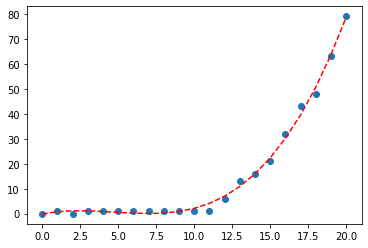

In [90]:
x = cases_df.index
y = cases_df["Cases"]
plt.scatter(x, y)

z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()